# Acquire and Prep - Wrangle

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import acquire

## Acquire the Data

Let's use acquire.py to pull data from the Zillow database using a SQL query, create a local csv pandas, and return a pandas DataFrame.

In [2]:
df = acquire.get_zillow_data()

### Sample and Summarize

Let's take a look at the DataFrame we brought in and document our initial findings.

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [4]:
#  Dataframe consists of:  Rows: 2,152,863 Columns: 7  

df.shape

(2152863, 7)

In [5]:
# Display readable summary statistics for numeric columns. 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [6]:
# Running .info() shows us that 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 131.4 MB


#### Acquire and Summarize Takeaways

- Data contains nulls
- All columns are float values
- bedroomcnt = bathroomcnt   Is that just a coincidence?

## Prepare the Data

### Finding Null Values

Let's check out some other ways to find Null values when you are dealing with a larger dataframe, especially one with more attributes and more missing values.

- np.nan values have a float data type. When a column you expect to have an integer data type reads in as a float, this may be signaling that there is one or more Null values present.

#### `.isnull().sum()`

In [8]:
# Find the total number of Null values in each column of our DataFrame.

df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [9]:
# Check for any Null values in each column of our DataFrame.

df.isnull().any()

bedroomcnt                       True
bathroomcnt                      True
calculatedfinishedsquarefeet     True
taxvaluedollarcnt                True
yearbuilt                        True
taxamount                        True
fips                            False
dtype: bool

In [10]:
# Return the names for any columns in our DataFrame with any Null values.

df.columns[df.isnull().any()]

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount'],
      dtype='object')

### Finding Odd Values
Let's find the odd values, including nulls 

In [32]:
#What are fips?

#FIPS: Federal Information Processing Standards
#In this case, it is  a unique county identifier code similar to zip code
#Those 3 values in our dataset represent: 6037: Los Angeles, 6059:Orange, 6111: Ventura

df.fips.value_counts()

6037.0    1425207
6059.0     552057
6111.0     162971
Name: fips, dtype: int64

### Drop Null Values

Let's drop observations that have any Null values; in this case, we have few compared to the amount of data we have that we can simply drop rows instead of imputing values to save observations.  If we want to fine tune later, we can come back and look at those more closely.  

In [11]:
# Drop all rows with any Null values, assign to df, and verify.

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 130.6 MB


In [13]:
# Check for any Null values afterwards 

#All nulls were dropped

df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

### Visualize Distributions
We can plot histograms and/or boxplots to see the distributions of single variables and check for skewness, outliers, and unit scales. Note, we don't have to split our data before exploring single variables. We DO have to split our data before performing bi- and multi-variate exploration.

#### `sns.displot()`

We can use Seaborn's `displot` to display the binned values from a column.

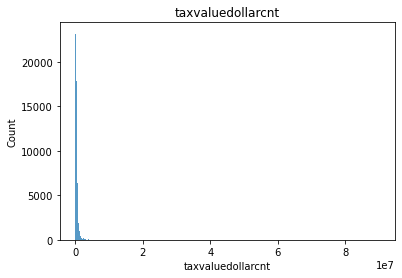

In [33]:
# The default is bins=10.

sns.histplot(x='taxvaluedollarcnt', data=df)

plt.title('taxvaluedollarcnt')
plt.show()

In [43]:
#Plot doesn't look evenly distributed.  Look at the range in values

df.taxvaluedollarcnt.min()

22.0

In [38]:

df.taxvaluedollarcnt.max()

90188462.0

In [40]:

df.taxvaluedollarcnt.median()

328296.0

#### `plt.subplot()` & `.hist()`

Here we'll loop through each of the numeric columns of interest and show the distribution of each on a separate subplot. We can use **`enumerate()`** to simplify our code.

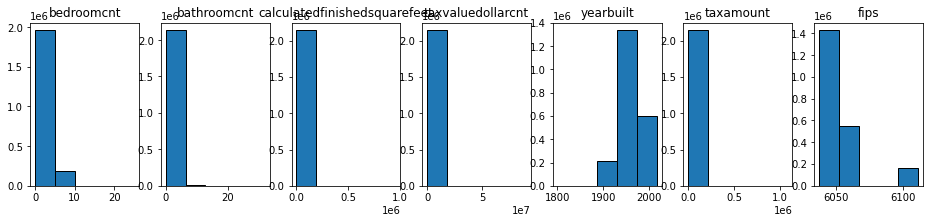

In [22]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedroomcnt', 'bathroomcnt','calculatedfinishedsquarefeet','taxvaluedollarcnt',
        'yearbuilt','taxamount','fips']

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,7, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    df[col].hist(bins=5, edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)

#### `sns.boxplot()`

Seaborn's `.boxplot` will default to plotting *all* the numeric variables if we don't specify specific x and y values. 

In [30]:
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06
mean,3.301419e+00,2.240352e+00,1.863194e+03,4.606416e+05,1.960968e+03,5.616711e+03,6.048310e+03
std,9.325998e-01,9.905489e-01,1.221754e+03,6.771576e+05,2.215056e+01,7.814563e+03,2.034491e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,2.200000e+01,1.801000e+03,6.340000e+00,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.258000e+03,1.891660e+05,1.949000e+03,2.540850e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.623000e+03,3.282960e+05,1.958000e+03,4.111470e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.208000e+03,5.346060e+05,1.976000e+03,6.411930e+03,6.059000e+03
max,2.500000e+01,3.200000e+01,9.525760e+05,9.018846e+07,2.016000e+03,1.078102e+06,6.111000e+03


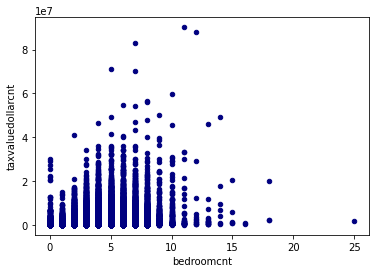

In [66]:
ax1 = df.plot.scatter(x='bedroomcnt',y='taxvaluedollarcnt',c='Navy')

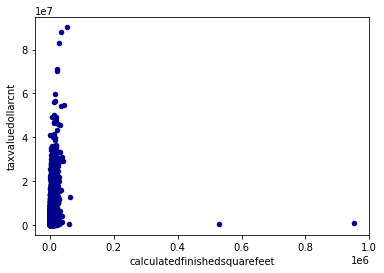

In [50]:
ax1 = df.plot.scatter(x='calculatedfinishedsquarefeet',y='taxvaluedollarcnt',c='DarkBlue')

In [51]:
df.calculatedfinishedsquarefeet.max()

952576.0

In [52]:
df.calculatedfinishedsquarefeet.median()

1623.0

In [ ]:
#Outliers Detected!

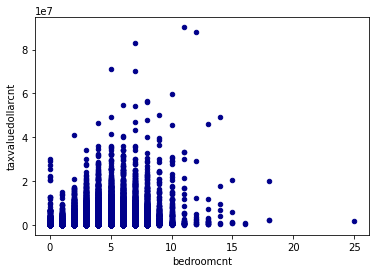

In [54]:
ax1 = df.plot.scatter(x='bedroomcnt',y='taxvaluedollarcnt',c='DarkBlue')

In [57]:
df.bedroomcnt.value_counts()

3.0     962944
4.0     633608
2.0     334221
5.0     150671
6.0      25117
1.0      22895
7.0       4792
0.0       4397
8.0       1103
9.0        290
10.0       118
11.0        34
13.0        15
12.0        12
14.0         7
15.0         5
18.0         3
16.0         2
25.0         1
Name: bedroomcnt, dtype: int64

In [59]:
df.bathroomcnt.value_counts()

2.00     942463
3.00     422398
1.00     412582
2.50     142827
4.00      82039
1.50      31157
3.50      28464
5.00      28306
4.50      19474
6.00      10717
5.50       6201
7.00       4381
0.00       4274
8.00       1681
6.50       1330
9.00        707
7.50        382
10.00       322
11.00       145
8.50        108
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
14.50         1
32.00         1
19.50         1
19.00         1
Name: bathroomcnt, dtype: int64

In [63]:
# Check to see how many are listed with no bedrooms and no bathrooms 
# Should they be considered single family residential homes?
no_bed_no_bath = df[(df.bedroomcnt == 0) & (df.bathroomcnt == 0 )]
no_bed_no_bath

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
15,0.0,0.0,203.0,14166.0,1960.0,163.79,6037.0
866,0.0,0.0,220.0,13840.0,1988.0,327.80,6037.0
2306,0.0,0.0,1776.0,79574.0,1989.0,1137.90,6037.0
...,...,...,...,...,...,...,...
2144648,0.0,0.0,936.0,33811.0,1961.0,536.25,6037.0
2146189,0.0,0.0,330.0,16311.0,1925.0,297.36,6037.0
2146660,0.0,0.0,676.0,234580.0,1922.0,3013.57,6037.0
2149054,0.0,0.0,938.0,56733.0,1978.0,986.86,6037.0


### Takeaways:
- calculatedfinishedsquarefeet contains outliers; refer to chart above
- 4274 contain 0 bathrooms --> drop those?
- 4397 contain 0 bedrooms --> drop those?
- 3345 contain 0 beds and 0 baths --> drop those?

### Function to Remove Outliers per John Salas

In [70]:
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [71]:
df.columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips'],
      dtype='object')

In [72]:
df.shape

(2140235, 7)

In [73]:
  df = remove_outliers(df, 1.5, ['calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'taxamount','bedroomcnt', 'bathroomcnt'] )

In [ ]:
#Let's look at the data after outliers were removed per the function

# 2,140,235 - 1,434,769 = 705,466 outliers removed - Is this too much? Change my K value?

In [74]:
df.shape

(1434769, 7)

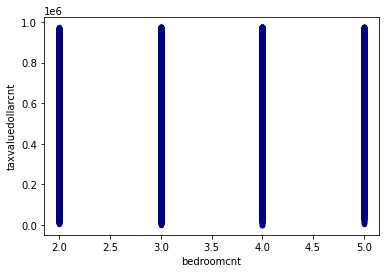

In [75]:
ax1 = df.plot.scatter(x='bedroomcnt',y='taxvaluedollarcnt',c='Navy')

#Number of bedrooms are now only up to 5 with outliers removed

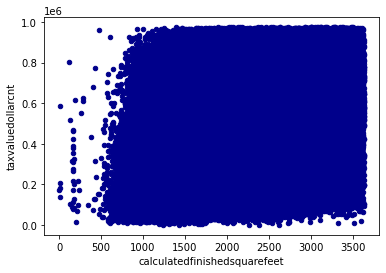

In [76]:
ax1 = df.plot.scatter(x='calculatedfinishedsquarefeet',y='taxvaluedollarcnt',c='DarkBlue')

#Square feet is only up to a little over 3500 sq ft after outliers removed

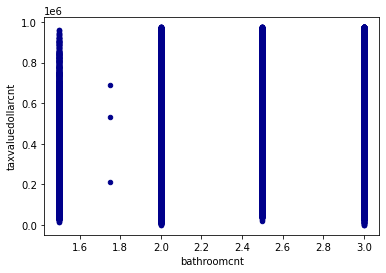

In [78]:
ax1 = df.plot.scatter(x='bathroomcnt',y='taxvaluedollarcnt',c='DarkBlue')

# Bathrooms only go up to 3 after outliers removed

In [85]:
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])


df.apply(minMax)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
min,2.0,1.5,2.0,22.0,1801.0,16.48,6037.0
max,5.0,3.0,3632.0,974403.0,2016.0,10546.45,6111.0


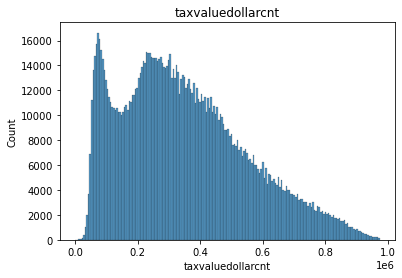

In [88]:
# The default is bins=10.

sns.histplot(x='taxvaluedollarcnt', data=df)

plt.title('taxvaluedollarcnt')
plt.show()

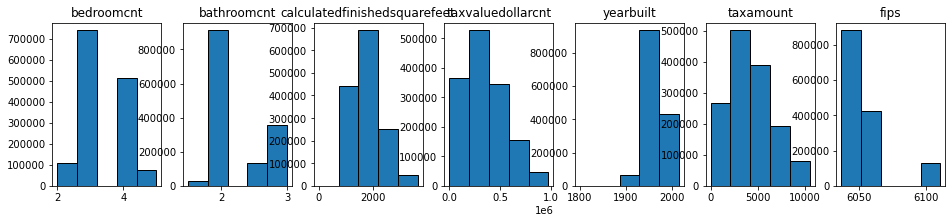

In [89]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedroomcnt', 'bathroomcnt','calculatedfinishedsquarefeet','taxvaluedollarcnt',
        'yearbuilt','taxamount','fips']

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,7, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    df[col].hist(bins=5, edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)